A certain organization wants an early estimate of their employee churn out rate. So the HR department gathered the data regarding the employee’s salary hike and the churn out rate in a financial year. The analytics team will have to perform an analysis and predict an estimate of employee churn based on the salary hike. Build a Simple Linear Regression model with churn out rate as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models.

In [1]:
# Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import scipy
import warnings
warnings.filterwarnings(action='ignore',category=UserWarning)

In [2]:
# Importing dataset
data = pd.read_csv('C:/Users/vaibh/Desktop/360 Digitmg/SImple Regression\Asssignments/emp_data.csv')
data.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [3]:
# checking dimensions of the dataset
data.shape

(10, 2)

In [4]:
# checking for null values
data.isnull().sum()

Salary_hike       0
Churn_out_rate    0
dtype: int64

There are no null values

In [5]:
# checking for duplicate value
data.duplicated().sum()

0

There are no duplicate values

In [6]:
# Descriptive statistics of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary_hike,10.0,1688.6,92.096809,1580.0,1617.50,1675.0,1724.00,1870.0
Churn_out_rate,10.0,72.9,10.257247,60.0,65.75,71.0,78.75,92.0


In [7]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Salary_hike     10 non-null     int64
 1   Churn_out_rate  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


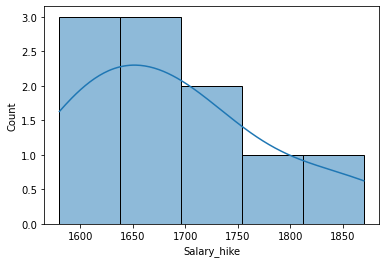

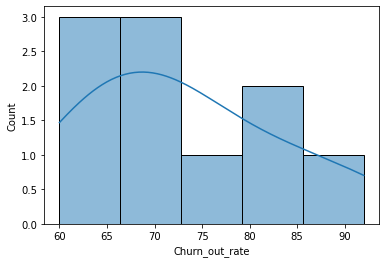

In [8]:
# Plotting histogram to check distribution of the features
sns.histplot(data['Salary_hike'],kde=1);plt.show()
sns.histplot(data['Churn_out_rate'],kde=1);plt.show()

The data is normal slightly right skewed

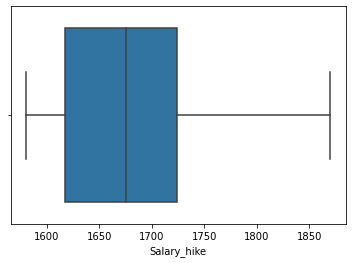

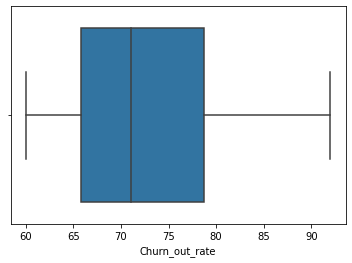

In [9]:
# Checking for outliers
sns.boxplot(x = data.Salary_hike);plt.show()
sns.boxplot(x = data.Churn_out_rate);plt.show()

There are no outliers in the dataset

<AxesSubplot:xlabel='Salary_hike', ylabel='Churn_out_rate'>

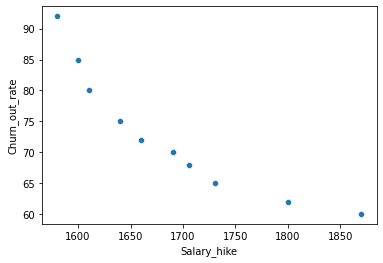

In [10]:
sns.scatterplot(y = data['Churn_out_rate'], x = data['Salary_hike'])

In [11]:
# Correlation between the features
data.corr()

,Salary_hike,Churn_out_rate
Salary_hike,1.000000,-0.911722
Churn_out_rate,-0.911722,1.000000


There is high negative correlation between the two features Salary Hike and Churn out rate

# MODEL 1

In [12]:
# importing statsmodels for Simple Linear Regression

import statsmodels.formula.api as smf

model = smf.ols('Churn_out_rate ~ Salary_hike',data = data).fit()    # fiting the data to OLS model

In [13]:
# Summary of the model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           0.000239
Time:                        12:00:15   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We get an R-squared value of 0.831

In [14]:
# Predicting the Weight based on the model 
pred1 = model.predict(data.Salary_hike)
pred1

0    83.927531
1    81.896678
2    80.881252
3    77.834973
4    75.804120
5    72.757840
6    71.133158
7    68.696134
8    61.588149
9    54.480164
dtype: float64

In [15]:
# RMSE Error calculation (Model-1)

res1 = data.Churn_out_rate - pred1
rmse1 = np.sqrt(np.mean(res1 * res1))

r_sqared1 = model.rsquared  
print(f'\nR-Squared value for model 1 : {r_sqared1}')
print(f'\nRMSE for model 1 : {rmse1}')


R-Squared value for model 1 : 0.8312363099883752

RMSE for model 1 : 3.997528462337793


# MODEL 2

Using log of x

In [16]:
model2 = smf.ols('Churn_out_rate ~ np.log(Salary_hike)',data = data).fit()
summary2 = model2.summary() ; print(summary2)                    # Model summary 
r_sqared2 = model2.rsquared                                      # Model r-squared value

pred2 = model2.predict(data.Salary_hike)                            # Using the model to predict 

res2 = data.Churn_out_rate - pred2                                       # Calculating Error between actual and predicted 
rmse2 = np.sqrt(np.mean(res2 * res2))
print(f'\nR-Squared value for model 2 : {r_sqared2}')
print(f'\nRMSE for model 2 : {rmse2}')

                            OLS Regression Results                            
Dep. Variable:         Churn_out_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Thu, 28 Jul 2022   Prob (F-statistic):           0.000153
Time:                        12:01:20   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    

# MODEL 3

Using log of y and log of x

In [17]:
model3 = smf.ols('np.log(Churn_out_rate) ~ np.log(Salary_hike)',data = data).fit()
summary3 = model3.summary() ; print(summary3)                    # Model summary 
r_sqared3 = model3.rsquared                                      # Model r-squared value

pred3 = np.exp(model3.predict(data.Salary_hike))                       # Using the model to predict 

res3 = data.Churn_out_rate - pred3                                       # Calculating Error between actual and predicted 
rmse3 = np.sqrt(np.mean(res3 * res3))
print(f'\nR-Squared value for model 3 : {r_sqared3}')
print(f'\nRMSE for model 3 : {rmse3}')

                              OLS Regression Results                              
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.889
Model:                                OLS   Adj. R-squared:                  0.875
Method:                     Least Squares   F-statistic:                     64.13
Date:                    Thu, 28 Jul 2022   Prob (F-statistic):           4.33e-05
Time:                            12:02:12   Log-Likelihood:                 17.167
No. Observations:                      10   AIC:                            -30.33
Df Residuals:                           8   BIC:                            -29.73
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

# MODEL 4

Using polynomial relationship between x and y

In [18]:
model4 = smf.ols('np.log(Churn_out_rate) ~ Salary_hike + I(Salary_hike * Salary_hike)',data = data).fit()
summary4 = model4.summary() ; print(summary4)                    # Model summary 
r_sqared4 = model4.rsquared                                      # Model r-squared value

pred4 = np.exp(model4.predict(data.Salary_hike))                       # Using the model to predict 

res4 = data.Churn_out_rate - pred4                                       # Calculating Error between actual and predicted 
rmse4 = np.sqrt(np.mean(res4 * res4))
print(f'\nR-Squared value for model 4 : {r_sqared4}')
print(f'\nRMSE for model 4 : {rmse4}')

                              OLS Regression Results                              
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.984
Model:                                OLS   Adj. R-squared:                  0.979
Method:                     Least Squares   F-statistic:                     210.1
Date:                    Thu, 28 Jul 2022   Prob (F-statistic):           5.63e-07
Time:                            12:02:54   Log-Likelihood:                 26.728
No. Observations:                      10   AIC:                            -47.46
Df Residuals:                           7   BIC:                            -46.55
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

# MODEL 5

Using log of y with x

In [19]:
model5 = smf.ols('np.log(Churn_out_rate) ~ Salary_hike',data = data).fit()
summary5 = model5.summary() ; print(summary5)                    # Model summary 
r_sqared5 = model5.rsquared                                      # Model r-squared value

pred5 = np.exp(model5.predict(data.Salary_hike))                       # Using the model to predict 

res5 = data.Churn_out_rate - pred5                                       # Calculating Error between actual and predicted 
rmse5 = np.sqrt(np.mean(res5 * res5))
print(f'\nR-Squared value for model 5 : {r_sqared5}')
print(f'\nRMSE for model 5 : {rmse5}')

                              OLS Regression Results                              
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.874
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     55.26
Date:                    Thu, 28 Jul 2022   Prob (F-statistic):           7.38e-05
Time:                            12:03:22   Log-Likelihood:                 16.511
No. Observations:                      10   AIC:                            -29.02
Df Residuals:                           8   BIC:                            -28.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept 

In [20]:
# Comparing R-squared and error for each model

results = pd.DataFrame([],index =['R-Squared', 'RMSE'])
results['Model_1'] = r_sqared1, rmse1
results['Model_2'] = r_sqared2, rmse2
results['Model_3'] = r_sqared3, rmse3
results['Model_4'] = r_sqared4, rmse4
results['Model_5'] = r_sqared5, rmse5
results.T

,R-Squared,RMSE
Model_1,0.831236,3.997528
Model_2,0.848624,3.786004
Model_3,0.889093,3.318328
Model_4,0.983612,1.326790
Model_5,0.873545,3.541549


Model_4 using polynomial equation is the best model with the highest R-squared value and has low RMSE

In [21]:
# Using train test split

from sklearn import model_selection

train, test = model_selection.train_test_split(data, test_size = 0.2)

In [22]:
# Using the best model (Model_4)
# Fitting the train data to the model

best_model = smf.ols('np.log(Churn_out_rate) ~ Salary_hike + I(Salary_hike * Salary_hike)',data = train).fit()

In [23]:
# Predicting for test data
best_pred_test = best_model.predict(test.Salary_hike)
best_pred_test

7    4.170394
6    4.204666
dtype: float64

In [24]:
# RMSE Error calculation for test data

res_test = test.Churn_out_rate - best_pred_test
rmse_test = np.sqrt(np.mean(res_test * res_test))

r_sqared_test = best_model.rsquared  
print(f'\nR-Squared value for test data : {r_sqared_test}')
print(f'\nRMSE for test data : {rmse_test}')


R-Squared value for test data : 0.9826485463824176

RMSE for test data : 62.33011169052652


In [25]:
# Predicting for train data
best_pred_train = best_model.predict(train.Salary_hike)

# RMSE Error calculation for train data

res_train = train.Churn_out_rate - best_pred_train
rmse_train = np.sqrt(np.mean(res_train * res_train))

r_sqared_train = best_model.rsquared  
print(f'\nR-Squared value for train data : {r_sqared_train}')
print(f'\nRMSE for train data : {rmse_train}')


R-Squared value for train data : 0.9826485463824176

RMSE for train data : 70.92331430195128


The train and test data have the same rsquared value and very low RMSE values.

The base model_4 gives a good relationship between the churn out rate and salary of the employee